In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import data, wb
from datetime import datetime
import fix_yahoo_finance as yf

In [ ]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','YHOO']

In [ ]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

In [ ]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [ ]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-10,143.600006,143.880005,142.899994,143.169998,140.940399,18933400
2017-04-11,142.940002,143.350006,140.059998,141.630005,139.424393,30379400
2017-04-12,141.600006,142.149994,141.009995,141.800003,139.591721,20350000
2017-04-13,141.910004,142.380005,141.050003,141.050003,138.853424,17822900
2017-04-17,141.479996,141.880005,140.869995,141.830002,139.621262,16582100


In [ ]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-04,164.880005,172.009995,164.770004,171.610001,171.610001,34605500
2018-04-05,172.580002,174.229996,172.080002,172.800003,172.800003,26933200
2018-04-06,170.970001,172.479996,168.199997,168.380005,168.380005,35005300
2018-04-09,169.880005,173.089996,169.850006,170.050003,170.050003,29017700
2018-04-10,173.000000,174.000000,171.529999,173.250000,173.250000,28408600


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-04-10 to 2018-04-10
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,161.091627,162.337064,159.821787,161.101111,159.988139,2.987316e+07
std,11.227635,11.412976,11.150972,11.241789,11.808100,1.228823e+07
min,141.220001,141.880005,140.059998,140.679993,138.489166,1.402670e+07
25%,153.410000,153.987503,152.082501,153.169995,151.387272,2.123988e+07
50%,159.824997,160.985001,158.540001,159.870003,158.650512,2.639865e+07
75%,172.075001,173.107506,170.492497,171.737499,171.205632,3.508818e+07
max,182.589996,183.500000,180.210007,181.720001,181.720001,8.659380e+07


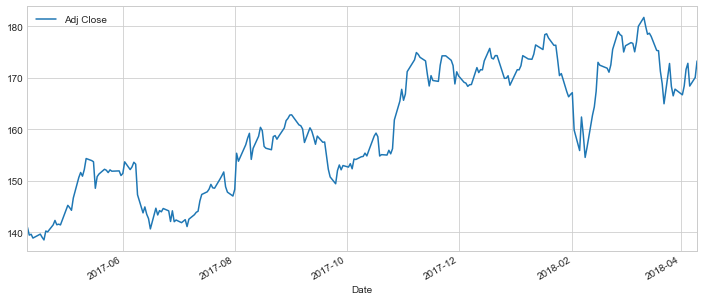

In [ ]:
AAPL['Adj Close'].plot(legend = True, figsize = (12,5))

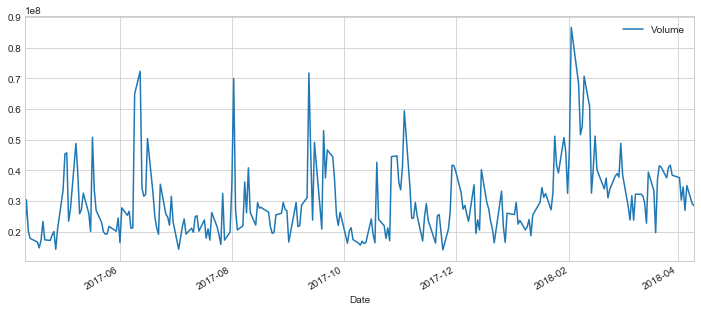

In [ ]:
AAPL['Volume'].plot(legend=True,figsize=(12,5))

#### MOVING AVERAGES
For 10 20 50 day period.

In [ ]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [ ]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2018-04-04,164.880005,172.009995,164.770004,171.610001,171.610001,34605500,168.711000,173.320000,170.874287
2018-04-05,172.580002,174.229996,172.080002,172.800003,172.800003,26933200,168.864000,173.208501,170.803865
2018-04-06,170.970001,172.479996,168.199997,168.380005,168.380005,35005300,168.817000,172.780501,170.701214
2018-04-09,169.880005,173.089996,169.850006,170.050003,170.050003,29017700,169.328000,172.284001,170.693910
2018-04-10,173.000000,174.000000,171.529999,173.250000,173.250000,28408600,169.375999,171.860501,170.742639


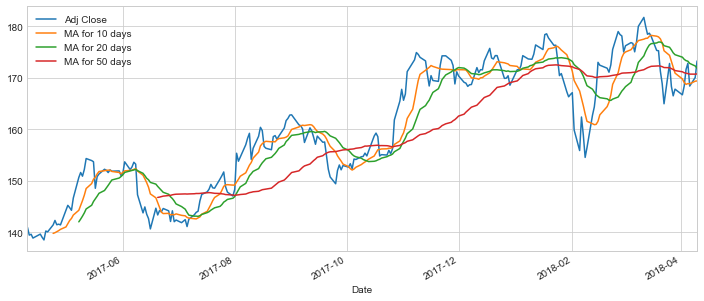

In [ ]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

In [ ]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [ ]:
AAPL['Daily Return'].tail()

Date
2018-04-04    0.019122
2018-04-05    0.006934
2018-04-06   -0.025579
2018-04-09    0.009918
2018-04-10    0.018818
Name: Daily Return, dtype: float64

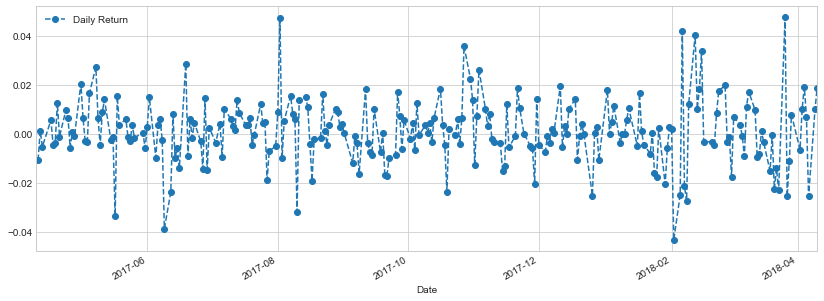

In [ ]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

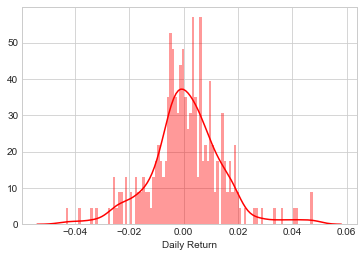

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

Positive daily return is more frequent than negative returns

In [ ]:
#Reading just the 'Adj Close' column this time
close_df = yf.download(tech_list,start,end)['Adj Close']


[*********************100%***********************]  5 of 5 downloaded


In [ ]:
close_df.tail()

,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2018-04-04,171.610001,1410.569946,1025.140015,92.330002,NaN
2018-04-05,172.800003,1451.750000,1027.810059,92.379997,NaN
2018-04-06,168.380005,1405.229980,1007.039978,90.230003,NaN
2018-04-09,170.050003,1406.079956,1015.450012,90.769997,NaN
2018-04-10,173.250000,1436.219971,1031.640015,92.879997,NaN


In [ ]:
rets_df = close_df.pct_change()

In [ ]:
rets_df.tail()

,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2018-04-04,0.019122,0.013304,0.011575,0.029205,NaN
2018-04-05,0.006934,0.029194,0.002605,0.000541,NaN
2018-04-06,-0.025579,-0.032044,-0.020208,-0.023273,NaN
2018-04-09,0.009918,0.000605,0.008351,0.005985,NaN
2018-04-10,0.018818,0.021435,0.015944,0.023246,NaN


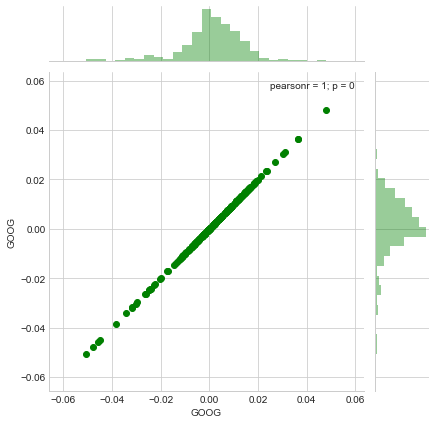

In [ ]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')

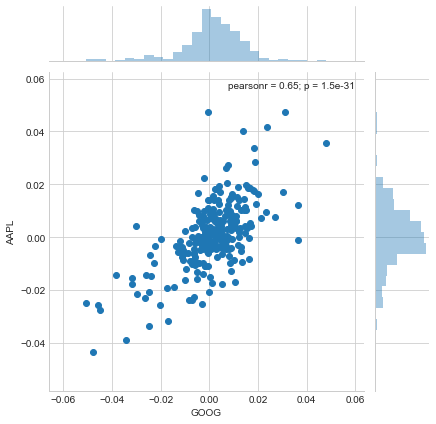

In [ ]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')

In [ ]:
rets = rets_df.dropna()

### Value at risk

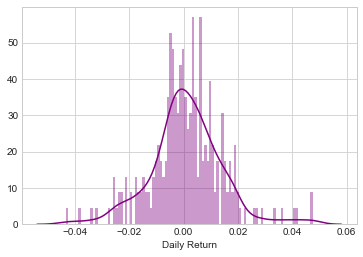

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
rets_df.head()

,AAPL,AMZN,GOOG,MSFT,YHOO
Date,,,,,
2017-04-10,NaN,NaN,NaN,NaN,NaN
2017-04-11,-0.010756,-0.005160,-0.001673,-0.000763,NaN
2017-04-12,0.001200,-0.006793,0.001178,-0.003818,NaN
2017-04-13,-0.005289,-0.012898,-0.000922,-0.004293,NaN
2017-04-17,0.005530,0.019578,0.016526,0.008160,NaN


In [ ]:
rets_df['AAPL'].quantile(0.05)

-0.022030926644797888

In [ ]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [ ]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price


In [ ]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-10,825.390015,829.349976,823.770020,824.729980,824.729980,978900
2017-04-11,824.710022,827.427002,817.020020,823.349976,823.349976,1079700
2017-04-12,821.929993,826.659973,821.020020,824.320007,824.320007,900500
2017-04-13,822.140015,826.380005,821.440002,823.559998,823.559998,1122400
2017-04-17,825.010010,837.750000,824.469971,837.169983,837.169983,895000
